Stundents

Leonel Mota Sampaio Durão

Luiz Augusto Facury de Souza

# Question 3.1

$f_1:(w_0, w) \longmapsto \frac{1}{n}  \sum_{i=1}^{n} log(1+ e^{-y_i(x_i^Tw + w_0)}) + \frac{\rho}{2}||w||_2^2$

Being $z = y_i(x_i^Tw + w_0)$, we have $\frac{\partial z}{w_0} = y_i$ and $\frac{\partial z} {w} = y_i x_i^T $

$ f_1 = \frac{1}{n}  \sum_{i=1}^{n} log(1+ e^{-z}) + \frac{\rho}{2}||w||_2^2 $

The Gradient is defined by: $\nabla f_1$ = $\begin{bmatrix} \frac{\partial f_1}{\partial w_0} \\ \frac{\partial f_1}{\partial w} \end{bmatrix}$ and $\sigma (z) = \frac {1}{1+e^z}  $

$\frac{\partial f_1}{\partial w_0} = \frac{1}{n}  \sum_{i=1}^{n} \frac{-y_i e^{-z}}{1+ e^{-z}} = \frac{1}{n}  \sum_{i=1}^{n} -y_i e^{-z} \sigma(z)$

$\frac{\partial f_1}{\partial w} = \frac{1}{n}  \sum_{i=1}^{n} \frac{-y_i x_i^T e^{-z}}{1+ e^{-z}} + \rho w = \frac{1}{n}  \sum_{i=1}^{n} -y_i x_i^T e^{-z} \sigma(z) + \rho w$

Calculating the Hessian

Quotient rule: $\frac{d}{dx} \frac{f(x)}{g(x)} = \frac{f'(x)g(x) - f(x)g'(x)}{g(x)^2}$



$\nabla^2 f_1$ = $\begin{bmatrix} \frac{\partial^2 f_1}{\partial w_0^2} & \frac{\partial^2 f_1}{\partial w_0 \partial w} \\ \frac{\partial^2 f_1}{\partial w \partial w_0} & \frac{\partial^2 f_1}{\partial w^2} \end{bmatrix}$

$\frac{\partial^2 f_1}{\partial w_0^2} = \frac{1}{n} \sum_{i=1}^{n} \frac{(y_i^2 e^{-z})(1 + e^{-z}) - (-y_i e^{-z}) (-y_i e^{-z})}{(1+ e^{-z})^2}      =     \frac{1}{n} \sum_{i=1}^{n} \frac{y_i^2 e^{-z} + y_i^2 e^{-2z} - y_i^2 e^{-2z}}{(1+ e^{-z})^2}    =   \frac{1}{n} \sum_{i=1}^{n} \frac{y_i^2 e^{-z}}{(1+ e^{-z})^2} $

$\frac{\partial^2 f_1}{\partial w_0 \partial w} = \frac{1}{n} \sum_{i=1}^{n} \frac{y_i^2 x_i^T e^{-z}}{(1+ e^{-z})^2}$

$\frac{\partial^2 f_1}{\partial w \partial w_0} = \frac{1}{n} \sum_{i=1}^{n} \frac{y_i^2 x_i^T e^{-z}}{(1+ e^{-z})^2}$

$\frac{\partial^2 f_1}{\partial w^2} = \frac{1}{n} \sum_{i=1}^{n} \frac{y_i^2 (x_i^T)^2 e^{-z}}{(1+ e^{-z})^2} + \rho I$

Determinant of Hessian

$det(\nabla^2 f_1) = \frac{1}{n^2} \sum_{i=1}^{n} \frac{y_i^2 e^{-z}}{(1+ e^{-z})^2} * (\frac{1}{n} \sum_{i=1}^{n} \frac{y_i^2 (x_i^T)^2 e^{-z}}{(1+ e^{-z})^2} + \rho) - (\frac{1}{n^2} \sum_{i=1}^{n} \frac{y_i^2 x_i^T e^{-z}}{(1+ e^{-z})^2})^2$

Therefore, the function is convex, since its determinant is strictly positive

# Question 3.2

In [110]:
import numpy as np

def f1(w0, w, X, y, rho):
    # Calculate the dot product of X and w
    dot_product = np.dot(X, w)
    # Calculate w0 + dot_product
    w0_dot = w0 + dot_product
    # Calculate -y_i*(w0_dot)
    y_w0_dot = -y * w0_dot
    # Calculate log(1 + e^(y_w0_dot))
    log_term = np.log(1 + np.exp(y_w0_dot))
    # Calculate the sum of log_term
    sum_log_term = np.sum(log_term)
    # Calculate the first term of the function
    first_term = sum_log_term
    # Calculate the second term of the function
    second_term = (rho/2) * np.dot(w, w)
    # Return the sum of the two terms
    return first_term + second_term


In [258]:
import numpy as np

def grad_f1(w_0, w, X, y, rho):
    print (y)
    n = len(y)
    z = y * (X.dot(w) + w_0)
    sig = 1 / (1 + np.exp(-z))
    grad_w_0 = -1/n * (y * np.exp(-z) * sig).sum()
    grad_w = -1/n * (X.T.dot(y * np.exp(-z) * sig)) + rho * w
    return grad_w_0, grad_w


In [244]:
# Sample input data
X = np.array([1,2,3,4,5,6,7]) # (3, 3)
y = np.array([1, -1, 1,1,-2,-1,1]) # (3,)
w_0 = 0.5
w = 1 # (3,)
rho = 0.1

# Compute the gradient
grad_w_0, grad_w = grad_f1(w_0, w, X, y, rho)

print("Gradient wrt w_0:", grad_w_0)
print("Gradient wrt w:", grad_w)


Gradient wrt w_0: 0.5284756798647275
Gradient wrt w: 2.602990013593906


In [102]:
def hessian_logreg_l2_1D(X, y, w, w_0, rho):
    n = len(y)
    z = y * (X*w + w_0)
    sig = 1 / (1 + np.exp(-z))
    diag_sig = np.diag(sig * (1 - sig))
    Hessian_w_0_w_0 = 1/n * ((y**2) * sig * (1 - sig)).sum()
    Hessian_w_0_w = 1/n * (y * X.T.dot(diag_sig))
    Hessian_w_w_0 = 1/n * (y * X.T.dot(diag_sig))
    Hessian_w_w = 1/n * X.T.dot(X * diag_sig) + rho * np.eye(1)
    return np.array([[Hessian_w_0_w_0, Hessian_w_0_w[0]], [Hessian_w_w_0[0], Hessian_w_w[0][0]]])


In [245]:
# Compute the Hessian
hessian = hessian_logreg_l2_1D(X, y, w, w_0, rho)

print("Hessian: \n", hessian)

Hessian: 
 [[0.03724109 0.02130664]
 [0.02130664 0.12130664]]


In [194]:
X = np.load('tfidf_matrix_97MB/data.npy')
y = np.load('train_labels.npy', allow_pickle=True)
np.load('tfidf_matrix_97MB/shape.npy')

array([138562,    575])

In [265]:
from scipy.optimize import check_grad
rho = 0.5
check_grad(f1, grad_f1, w_0, w, X, y, rho)

[ 1 -1  1  1 -2 -1  1]


/tmp/ipykernel_190346/3630132453.py:7: RuntimeWarning: overflow encountered in exp
  sig = 1 / (1 + np.exp(-z))
/tmp/ipykernel_190346/3630132453.py:8: RuntimeWarning: overflow encountered in exp
  grad_w_0 = -1/n * (y * np.exp(-z) * sig).sum()
/tmp/ipykernel_190346/3630132453.py:8: RuntimeWarning: invalid value encountered in multiply
  grad_w_0 = -1/n * (y * np.exp(-z) * sig).sum()
/tmp/ipykernel_190346/3630132453.py:9: RuntimeWarning: overflow encountered in exp
  grad_w = -1/n * (X.T.dot(y * np.exp(-z) * sig)) + rho * w
/tmp/ipykernel_190346/3630132453.py:9: RuntimeWarning: invalid value encountered in multiply
  grad_w = -1/n * (X.T.dot(y * np.exp(-z) * sig)) + rho * w
/tmp/ipykernel_190346/3493810218.py:11: RuntimeWarning: overflow encountered in exp
  log_term = np.log(1 + np.exp(y_w0_dot))


nan

# Question 3.3

In [248]:
def newton_logreg_l2_1D(X, y, w, w_0, rho, max_iter=1000, tol=1e-6):
    n = len(y)
    for i in range(max_iter):
        z = y * (X*w + w_0)
        sig = 1 / (1 + np.exp(-np.clip(z, -250, 250)))
        diag_sig = np.diag(sig * (1 - sig))
        gradient_w_0 = -1/n * (y * sig).sum()
        gradient_w = -1/n * X.T.dot(y * sig) + rho * w
        hessian_w_0_w_0 = 1/n * ((y**2) * sig * (1 - sig)).sum()
        hessian_w_0_w = 1/n * (y * X.T.dot(diag_sig))
        hessian_w_w_0 = 1/n * (y * X.T.dot(diag_sig))
        hessian_w_w = 1/n * X.T.dot(X * diag_sig) + rho * np.eye(1)
        hessian = np.array([[hessian_w_0_w_0, hessian_w_0_w[0]], [hessian_w_w_0[0], hessian_w_w[0][0]]])
        update_w_0, update_w = np.linalg.solve(hessian, [-gradient_w_0, -gradient_w])
        w_0 += update_w_0
        w += update_w
        if np.linalg.norm(update_w) < tol:
            break
    return w_0, w


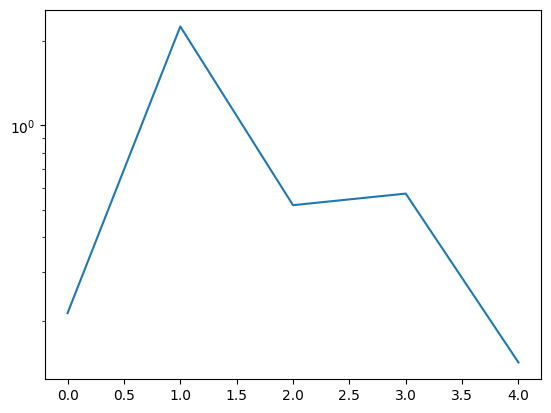

In [249]:
#Plot the norm of the gradient as a function of iterations in logarithmic scale
import matplotlib.pyplot as plt
rho = 0.2
w_0 = 0
w = 0

def plot_norm_grad(X, y, w, w_0, rho, max_iter=1000, tol=1e-6):
    n = len(y)
    norm_grad = []
    for i in range(max_iter):
        z = y * (X*w + w_0)
        sig = 1 / (1 + np.exp(-np.clip(z, -250, 250)))
        diag_sig = np.diag(sig * (1 - sig))
        gradient_w_0 = -1/n * (y * sig).sum()
        gradient_w = -1/n * X.T.dot(y * sig) + rho * w
        hessian_w_0_w_0 = 1/n * ((y**2) * sig * (1 - sig)).sum()
        hessian_w_0_w = 1/n * (y * X.T.dot(diag_sig))
        hessian_w_w_0 = 1/n * (y * X.T.dot(diag_sig))
        hessian_w_w = 1/n * X.T.dot(X * diag_sig) + rho * np.eye(1)
        hessian = np.array([[hessian_w_0_w_0, hessian_w_0_w[0]], [hessian_w_w_0[0], hessian_w_w[0][0]]])
        update_w_0, update_w = np.linalg.solve(hessian, [-gradient_w_0, -gradient_w])
        w_0 += update_w_0
        w += update_w
        norm_grad.append(np.linalg.norm(gradient_w))
        if np.linalg.norm(update_w) < tol:
            break
    plt.plot(norm_grad)
    plt.yscale('log')
    plt.show()
    return w_0, w

w_0, w = plot_norm_grad(X, y, w, w_0, rho)

# Question 3.4

In [254]:
rho = 0.1
newton_logreg_l2_1D(X, y, 1, 1, rho, tol = 1e-10)

(4.995272819336898e+108, 21.428571428571427)

Theoretically, the algorithm should converge to the minimum of the function, since the function is convex and the gradient is Lipschitz continuous. However, if (w0, w) is 1, you may observe that the method is unable to converge to a solution. This is because the initial point is not a good starting point for the optimization problem.The reason is that, Newton's method is a second order optimization method which means that it uses the information of the Hessian matrix in order to converge to a solution. if the initial point is not in a suitable region, the Hessian matrix might be not invertible or close to it, and the optimization algorithm will be unable to converge.

# Question 3.5

In [256]:
def armijo_line_search(x, y, w, w_0, rho, grad, hessian, alpha=0.5, beta=0.5):
    step_size = 1
    hessian_inv = np.linalg.inv(hessian)
    while f1(x, y, w + step_size * hessian_inv.dot(grad)[1], w_0 + step_size * hessian_inv.dot(grad)[0], rho) > f1(x, y, w, w_0, rho) + alpha * step_size * grad.T.dot(hessian_inv).dot(grad):
        step_size *= beta
    return step_size

def newton_logreg_l2(x, y, w, w_0, rho, max_iter=1000, tol=1e-6):
    for i in range(max_iter):
        grad = grad_f1(x, y, w, w_0, rho)
        hessian = hessian_logreg_l2_1D(x, y, w, w_0, rho)
        hessian_inv = np.linalg.inv(hessian)
        step_size = armijo_line_search(x, y, w, w_0, rho, grad, hessian_inv)
        update_w_0, update_w = step_size * hessian_inv.dot(grad)
        w_0 += update_w_0
        w += update_w
        if np.linalg.norm(update_w) < tol:
            break
    return w_0, w


Alpha is a parameter that controls the minimum amount of decrease required for the step size to be considered "sufficient", it is normally between 0,1 and 0.5. Beta is another parameter that controls the rate at which the step size is reduced, the value is also small, but can be a bit higher.

# Question 4.1

Since the l1 norm does not approach 0 as $w$ approaches its minimum, the Newton's method does not work.

# Question 4.2

The objective function can be written as:

$F2(w, w_0) = f2(w, w_0) + g2(w)$

where:

$f2(w, w_0) = \frac{1}{n} \sum_{i=1}^n log(1 + e^{-y_i(x_i^Tw + w_0)})$

$g2(w) = \rho ||w||_1$

The proximal operator of g2 is defined as:

$prox_{g2}(w, t) = sign(w) * max(|w| - t, 0)$

where $sign(w)$ is the element-wise sign of $w$ and $t$ is the step size.

The gradient of $f_2$ with respect to $w_0$ is:

$\frac{\partial f_2}{\partial w_0} = \frac{1}{n} \sum_{i=1}^{n} \frac{-y_i e^{-y_i(x_i^Tw + w_0)}}{1+ e^{-y_i(x_i^Tw + w_0)}}$

The gradient of $f_2$ with respect to $w$ is:

$\frac{\partial f_2}{\partial w} = \frac{1}{n} \sum_{i=1}^{n} \frac{-y_i x_i e^{-y_i(x_i^Tw + w_0)}}{1+ e^{-y_i(x_i^Tw + w_0)}}$

It's important to note that as it is, this is the gradient of the logistic loss function, which is differentiable.

# Question 4.3

In [243]:
def f2(x, y, w, w_0, rho):
    return np.log(1 + np.exp(-y * (w_0 + x.dot(w)))).sum() + rho * np.linalg.norm(w)**2

In [268]:
def proximal_gradient_method_l1(X, y, rho = 0.02, max_iter = 1000, epsilon = 1e-6):
    n, d = X.shape
    w = np.zeros(d)
    w_0 = 0
    alpha = 0.5
    beta = 0.8
    t = 1
    for i in range(max_iter):
        z = y * (X.dot(w) + w_0)
        sig = 1 / (1 + np.exp(-z))
        grad_w_0 = (-1/n) * y.dot(sig)
        grad_w = (-1/n) * X.T.dot(y * sig) + rho * np.sign(w)
        prev_w = w
        prev_w_0 = w_0
        w_0 = w_0 - t * grad_w_0
        w = w - t * grad_w
        w = np.maximum(w - t*rho, 0) + np.minimum(w + t*rho, 0)
        while f2(X, y, w, w_0) > f2(X, y, prev_w, prev_w_0) + alpha * t * (grad_w.T.dot(w - prev_w) + grad_w_0 * (w_0 - prev_w_0)):
            t = beta * t
            w_0 = prev_w_0 - t * grad_w_0
            w = prev_w - t * grad_w
            w = np.maximum(w - t*rho, 0) + np.minimum(w + t*rho, 0)
        if (np.linalg.norm(grad_w) < epsilon) and (np.abs(grad_w_0) < epsilon):
            break
    return w, w_0


The stopping test that i suggest is to check if the norm of the gradient is less than a certain tolerance (epsilon). This would mean that the function is close enough to a local minimum and the algorithm can stop.

